In [2]:
import numpy as np

In [27]:
class Perceptron(object):
    """Perceptron classifier
    Parameters
    ----------
    eta : float
        learning rate

    n_iter : numeric
        number of iterations to run and update weights
    
    random_state : numeric
        random initialization of weights

    Attributes
    ----------
    w_ : 1d-array
        final weights after fit; w_[0] represents the bias term
    errors_ : list
        number of misclassifications (updates) after each epoch

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """fitting the training data
        Parameters
        ----------
        X : matrix
            feature set of independent variables
        y : 1d-array
            target variables
        
        Returns
        ----------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        # small random numbers from normal(0,0.01) to initialize
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self 

    def net_input(self, X):
        """ compute step function input from weights and input """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """ step function classifier; returns class label """
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [11]:
# Testing our perceptron model
import os
import pandas as pd 
def wjoin(*args, **kwargs):
    return os.path.join(*args, **kwargs).replace(os.path.sep, "/")
s = wjoin('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases',
                 'iris','iris.data')
print('URL:', s)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [12]:
df = pd.read_csv(s,
                header=None,
                encoding='utf-8')
df.tail

<bound method NDFrame.tail of        0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [17]:
import matplotlib.pyplot as plt 

In [14]:
# get the setosa and versicolor values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [15]:
# extract sepal length and petal length
X= df.iloc[0:100, [0, 2]].values

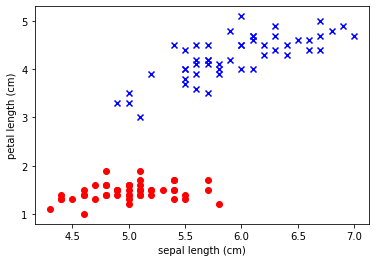

In [20]:
# plot data 
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='sertosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

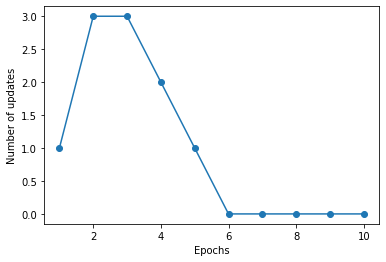

In [30]:
# apply the perceptron to the data
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()